In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import torch
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
def set_seed(seed = 1234):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
#     random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)



Device available now: cpu


In [ ]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# from albumentations import (ToFloat, Normalize, VerticalFlip, HorizontalFlip, Compose, Resize,
#                             RandomBrightnessContrast, HueSaturationValue, Blur, GaussNoise,
#                             Rotate, RandomResizedCrop, Cutout, ShiftScaleRotate)
# from albumentations.pytorch import ToTensorV2, ToTensor

import albumentations as A
from albumentations.pytorch import ToTensorV2

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [ ]:
df_train_csv = pd.read_csv('../input/siim-isic-melanoma-classification/train.csv')
df_test_csv = pd.read_csv('../input/siim-isic-melanoma-classification/test.csv')

df_train_csv.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [ ]:
train_patient = df_train_csv.patient_id.tolist()
test_patient = df_test_csv.patient_id.tolist()

same_patient = list()

# for i in train_patient:
# #     print(f'patient id: {i}')
#     for j in test_patient:
#         if(i==j):
#             same_patient.append(i)
#             print('paisi')
# print(same_patient)          
            

../input/siim-isic-melanoma-classification/jpeg/train/ISIC_9197054.jpg
torch.Size([4000, 6000, 3])


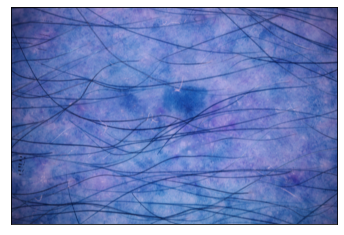

In [ ]:
path_ = '../input/siim-isic-melanoma-classification/jpeg/train'
train_files = [f for f in os.listdir(path_)]

fls = os.path.join(path_,train_files[524])
print(fls)

img = cv2.imread(fls)
img = torch.from_numpy(img)
print(img.shape)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
class Train_dataset(Dataset):
    

    def __init__(self, root_dir, csv_file = None,  transform=None):
        

        self.csv_file = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.csv_file)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        filename = self.csv_file.image_name.iloc[idx]+'.jpg'
        target = self.csv_file.target.iloc[idx]
        target = torch.tensor(target).float()
        
        fl_path = os.path.join(self.root_dir,filename)
        image = cv2.imread(fl_path)
#         image = torch.from_numpy(image)

#         sample = {'image': image, 'target': target}
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image = image)
#             image = image['image']

        return image, target

torch.Size([224, 224, 3])
<class 'torch.Tensor'>


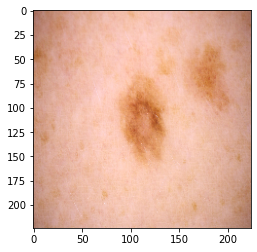

In [ ]:
# image_transform = A.Compose([
#     A.Resize(224, 224), 
#     A.HorizontalFlip(),
# #     A.Normalize(
# #         mean=[0.485, 0.456, 0.406],
# #         std=[0.229, 0.224, 0.225],
# #     ),
#     ToTensorV2()
# ])

def img_transfrom(image):
    trans_img = cv2.resize(image,(224,224))
    trans_img = torch.from_numpy(trans_img)
    return trans_img

cv2_transform = img_transfrom

path_train = '../input/siim-isic-melanoma-classification/jpeg/train'
path_train_csv = '../input/siim-isic-melanoma-classification/train.csv'

dset = Train_dataset(root_dir = path_train,csv_file = path_train_csv, transform = cv2_transform)


# plt.imshow(dset[8], cmap = 'gray', interpolation = 'bicubic',title = dset[8])

img, tag = dset[254]
print(img.shape)
print(type(img))
plt.imshow(img)

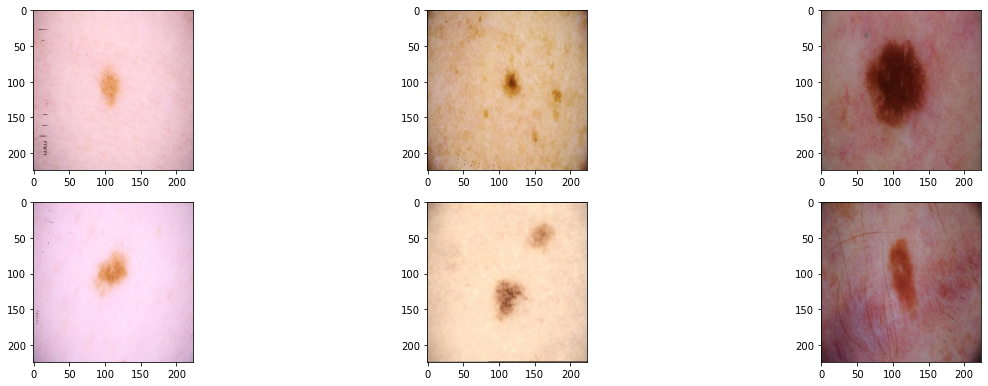

In [ ]:
num_of_pics = 6
c = 3
r = (num_of_pics/c)+1

img_ids = np.random.randint(len(train_patient), size=num_of_pics)


plt.figure(figsize=(20,10))

for i in range(num_of_pics):
    plt.subplot(r,c,i+1)
    img, tag = dset[img_ids[i]]
    plt.imshow(img, cmap = 'gray')
    
    

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import FloatTensor, LongTensor
from torch.utils.data import Dataset, DataLoader, Subset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision.models import resnet34, resnet50
from torch.optim import Adam, SGD

In [ ]:
def img_transfrom(image):
    trans_img = cv2.resize(image,(224,224))
    trans_img = trans_img.transpose(2,0,1)
    trans_img = torch.from_numpy(trans_img)
    return trans_img

cv2_transform = img_transfrom

path_train = '../input/siim-isic-melanoma-classification/jpeg/train'
path_train_csv = '../input/siim-isic-melanoma-classification/train.csv'

dataset_train = Train_dataset(root_dir = path_train,csv_file = path_train_csv, transform = cv2_transform)
data_loader = DataLoader(dataset_train, batch_size = 5, shuffle=True)

# Get a sample

In [ ]:
class ResNet50_Network(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.output_size = output_size
        
        # Define Feature part (IMAGE)
        self.features = resnet50(pretrained=True) # 1000 neurons out

        self.final = nn.Sequential(nn.Linear(1000, self.output_size),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.2))
        

        
        
    def forward(self, image, prints=False):
        
        if prints: print('Input Image shape:', image.shape, '\n')
        
        # Image CNN
        image = self.features(image)
        if prints: print('Features Image shape:', image.shape)
        
        out = self.final(image)

        if prints: print('Out shape:', out.shape)
        
        return out

In [ ]:
class custom_CNN(nn.Module):
    def __init__(self):
        super(custom_CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels=16,
                               kernel_size=3,
                               stride=1
                              )
        
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=16,
                               out_channels=32,
                               kernel_size=3,
                               stride=1
                               )
        self.fc1 = nn.Linear(32* 54* 54, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 1)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x.float())))
        x = self.pool(F.relu(self.conv2(x)))
#         print(f'shape of last convo: {x.shape}')
        x = x.view(-1, 32* 54* 54)
#         print(f'shape after view: {x.shape}')
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x
        
        

In [ ]:
model = custom_CNN()
print(model)

custom_CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=93312, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=1, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    batch_no =0
    for data, label in data_loader:
#         print(f'Running epoch {epoch}, batch no {batch_no}')
        optimizer.zero_grad()
        
        outputs = model(data)    
        outputs = torch.squeeze(outputs)
        print(outputs)
        print(label)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        batch_no+=1
        
        if batch_no%5 ==0:
            print(f'Running epoch {epoch}, batch no {batch_no}')
            print(f'total loss after {batch_no} batches ---- Loss: {running_loss}')
            running_loss = 0
            



Running epoch 0, batch no 5
total loss after 5 batches ---- Loss: 0.0
Running epoch 0, batch no 10
total loss after 10 batches ---- Loss: 20.0
Running epoch 0, batch no 15
total loss after 15 batches ---- Loss: 20.0


KeyboardInterrupt: 